# Tasks 


#### 1: Download the customer data set and add it to your “Original Data” folder.

#### 2: Create a new notebook in your “Scripts” folder for part 1 of this task.
    
#### 3: Import your analysis libraries, as well as your new customer data set as a dataframe.
    
#### 4: Wrangle the data so that it follows consistent logic; for example, rename columns with illogical names and drop columns that don’t add anything to your analysis.
    
#### 5: Complete the fundamental data quality and consistency checks you’ve learned throughout this Achievement; for example, check for and address missing values and duplicates, and convert any mixed-type data.
    
#### 6: Combine your customer data with the rest of your prepared Instacart data. (Hint: Make sure the key columns are the same data type!)
    
#### 7: Ensure your notebook contains logical titles, section headings, and descriptive code comments.
    
#### 8: Export this new dataframe as a pickle file so you can continue to use it in the second part of this task.
    
#### 9: Save your notebook so that you can send it to your tutor for review after completing part 2.

#### 3: Import your analysis libraries, as well as your new customer data set as a dataframe.

# Importing Libraries

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Importing Data

In [3]:
#Importing dataset
path = r'C:\Users\maxca\Instacart Basket Analysis'

In [4]:
#Customer Data
df_cust = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'customers.csv'), index_col = False)

In [5]:
df_cust.head()

,user_id,First Name,Surnam,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665
1,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285
2,65803,Kenneth,Farley,Male,Idaho,35,1/1/2017,2,married,99568
3,125935,Michelle,Hicks,Female,Iowa,40,1/1/2017,0,single,42049
4,130797,Ann,Gilmore,Female,Maryland,26,1/1/2017,1,married,40374


In [7]:
# Shape
df_cust.shape

(206209, 10)

In [8]:
#Prepared Data
df_prepared = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'df_Instacart_Prepared_Data.pkl'))

In [9]:
df_prepared.head()

,order_id,user_id,number_of_orders,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,price_range_loc,busiest_day,busiest_days,busiest_hours,max_order,loyalty_flag,product_price_mean,spending_flag,order_frequency_mean,order_frequency_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New Customer,6.367797,Low spender,20.259259,Non-frequent customer
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Mid-range product,Regularly busy,Least busy days,Average orders,10,New Customer,6.367797,Low spender,20.259259,Non-frequent customer
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Mid-range product,Regularly busy,Least busy days,Most orders,10,New Customer,6.367797,Low spender,20.259259,Non-frequent customer
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Mid-range product,Least busy,Least busy days,Average orders,10,New Customer,6.367797,Low spender,20.259259,Non-frequent customer
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Mid-range product,Least busy,Least busy days,Most orders,10,New Customer,6.367797,Low spender,20.259259,Non-frequent customer


# Data Wrangling

#### 4: Wrangle the data so that it follows consistent logic; for example, rename columns with illogical names and drop columns that don’t add anything to your analysis.

In [10]:
#Checking for Data Types df_cust
df_cust.dtypes

user_id          int64
First Name      object
Surnam          object
Gender          object
STATE           object
Age              int64
date_joined     object
n_dependants     int64
fam_status      object
income           int64
dtype: object

In [11]:
#Checking for Data Types df_prepared
df_prepared.dtypes

order_id                    int64
user_id                     int64
number_of_orders            int64
orders_day_of_week          int64
order_hour_of_day           int64
days_since_prior_order    float64
product_id                  int64
add_to_cart_order           int64
reordered                   int64
product_name               object
aisle_id                    int64
department_id               int64
prices                    float64
price_range_loc            object
busiest_day                object
busiest_days               object
busiest_hours              object
max_order                   int64
loyalty_flag               object
product_price_mean        float64
spending_flag              object
order_frequency_mean      float64
order_frequency_flag       object
dtype: object

## Missing Values

#### 5: Complete the fundamental data quality and consistency checks you’ve learned throughout this Achievement; for example, check for and address missing values and duplicates, and convert any mixed-type data.

In [12]:
# Finding Missing Values

df_cust.isnull().sum()

user_id             0
First Name      11259
Surnam              0
Gender              0
STATE               0
Age                 0
date_joined         0
n_dependants        0
fam_status          0
income              0
dtype: int64

In [13]:
df_cust[df_cust['First Name'].isnull() == True]

,user_id,First Name,Surnam,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
53,76659,NaN,Gilbert,Male,Colorado,26,1/1/2017,2,married,41709
73,13738,NaN,Frost,Female,Louisiana,39,1/1/2017,0,single,82518
82,89996,NaN,Dawson,Female,Oregon,52,1/1/2017,3,married,117099
99,96166,NaN,Oconnor,Male,Oklahoma,51,1/1/2017,1,married,155673
105,29778,NaN,Dawson,Female,Utah,63,1/1/2017,3,married,151819
...,...,...,...,...,...,...,...,...,...,...
206038,121317,NaN,Melton,Male,Pennsylvania,28,3/31/2020,3,married,87783
206044,200799,NaN,Copeland,Female,Hawaii,52,4/1/2020,2,married,108488
206090,167394,NaN,Frost,Female,Hawaii,61,4/1/2020,1,married,45275
206162,187532,NaN,Floyd,Female,California,39,4/1/2020,0,single,56325


### Can't impute missing first names and the amount of missing datapoints doesn't let me drop them.


## Consistency Checks

In [14]:
df_cust.describe()

,user_id,Age,n_dependants,income
count,206209.000000,206209.000000,206209.000000,206209.000000
mean,103105.000000,49.501646,1.499823,94632.852548
std,59527.555167,18.480962,1.118433,42473.786988
min,1.000000,18.000000,0.000000,25903.000000
25%,51553.000000,33.000000,0.000000,59874.000000
50%,103105.000000,49.000000,1.000000,93547.000000
75%,154657.000000,66.000000,3.000000,124244.000000
max,206209.000000,81.000000,3.000000,593901.000000


## Finding Duplicates

In [15]:
df_cust[df_cust.duplicated()]

,user_id,First Name,Surnam,Gender,STATE,Age,date_joined,n_dependants,fam_status,income


In [20]:
df_cust.shape

(206209, 10)

### No duplicates

## There are wrong values in the prices column of the df_prepared data we fix it now

In [16]:
df_prepared.describe()

,order_id,user_id,number_of_orders,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,product_price_mean,order_frequency_mean
count,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.032876e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240485e+07
mean,1.710745e+06,1.029372e+05,1.714230e+01,2.738867e+00,1.342515e+01,1.110408e+01,2.559866e+04,8.352547e+00,5.895873e-01,7.119612e+01,9.919792e+00,1.198023e+01,3.305217e+01,1.198023e+01,1.137498e+01
std,9.872988e+05,5.946610e+04,1.753532e+01,2.090077e+00,4.246380e+00,8.779064e+00,1.408400e+04,7.127071e+00,4.919087e-01,3.821139e+01,6.281485e+00,4.956554e+02,2.515525e+01,8.324227e+01,6.056176e+00
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,8.559470e+05,5.142200e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,1.354400e+04,3.000000e+00,0.000000e+00,3.100000e+01,4.000000e+00,4.200000e+00,1.300000e+01,7.387298e+00,6.852941e+00
50%,1.711049e+06,1.026160e+05,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,2.530200e+04,6.000000e+00,1.000000e+00,8.300000e+01,9.000000e+00,7.400000e+00,2.600000e+01,7.824786e+00,9.884956e+00
75%,2.565499e+06,1.543890e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,3.794700e+04,1.100000e+01,1.000000e+00,1.070000e+02,1.600000e+01,1.130000e+01,4.700000e+01,8.254023e+00,1.486500e+01
max,3.421083e+06,2.062090e+05,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,4.968800e+04,1.450000e+02,1.000000e+00,1.340000e+02,2.100000e+01,9.999900e+04,9.900000e+01,2.500542e+04,3.000000e+01


<Axes: xlabel='prices', ylabel='prices'>

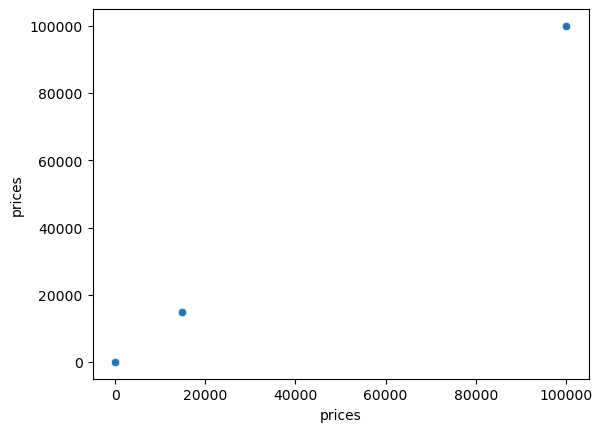

In [14]:
sns.scatterplot(x = 'prices', y = 'prices',data = df_prepared)

In [17]:
#Checking for unusual Numbers
df_prepared.loc[df_prepared['prices'] > 100]

,order_id,user_id,number_of_orders,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,price_range_loc,busiest_day,busiest_days,busiest_hours,max_order,loyalty_flag,product_price_mean,spending_flag,order_frequency_mean,order_frequency_flag
10030345,912404,17,12,2,14,5.0,21553,5,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular Customer,108.648299,High spender,8.268041,Frequent customer
10030346,603376,17,22,6,16,4.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular Customer,108.648299,High spender,8.268041,Frequent customer
10030347,3264360,135,2,2,21,13.0,21553,6,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Regularly busy,Average orders,4,New Customer,1154.792308,High spender,11.916667,Regular customer
10030348,892534,135,3,0,8,12.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Busiest day,Busiest days,Average orders,4,New Customer,1154.792308,High spender,11.916667,Regular customer
10030349,229704,342,8,1,19,30.0,21553,9,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Busiest days,Average orders,16,Regular Customer,114.426619,High spender,20.106061,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,2249946,204099,29,0,8,4.0,33664,1,0,2 % Reduced Fat Milk,...,High-range product,Busiest day,Busiest days,Average orders,39,Regular Customer,1106.743956,High spender,8.118644,Frequent customer
29166210,2363282,204099,31,0,9,2.0,33664,1,1,2 % Reduced Fat Milk,...,High-range product,Busiest day,Busiest days,Average orders,39,Regular Customer,1106.743956,High spender,8.118644,Frequent customer
29166211,3181945,204395,13,3,15,8.0,33664,25,0,2 % Reduced Fat Milk,...,High-range product,Regularly busy,Least busy days,Most orders,15,Regular Customer,451.153540,High spender,4.971292,Frequent customer
29166212,2486215,205227,7,3,20,4.0,33664,8,0,2 % Reduced Fat Milk,...,High-range product,Regularly busy,Least busy days,Average orders,12,Regular Customer,1178.381871,High spender,11.840491,Regular customer


In [18]:
# Turning them into NaN
df_prepared.loc[df_prepared['prices'] >100, 'prices'] = np.nan

In [17]:
df_prepared['prices'].max()

25.0

In [19]:
df_prepared.shape

(32404859, 23)

# Combining both Dataframes

#### 6: Combine your customer data with the rest of your prepared Instacart data. (Hint: Make sure the key columns are the same data type!)

### Since the user_id  is the only column that exists in both data frames we will do an Inner Join¶

In [21]:
df_final = df_cust.merge(df_prepared, on = 'user_id', indicator = 'exists')

In [22]:
df_final.head()

,user_id,First Name,Surnam,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,...,busiest_day,busiest_days,busiest_hours,max_order,loyalty_flag,product_price_mean,spending_flag,order_frequency_mean,order_frequency_flag,exists
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Busiest days,Average orders,8,New Customer,7.988889,Low spender,19.823529,Regular customer,both
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Regularly busy,Most orders,8,New Customer,7.988889,Low spender,19.823529,Regular customer,both
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Busiest days,Most orders,8,New Customer,7.988889,Low spender,19.823529,Regular customer,both
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Regularly busy,Average orders,8,New Customer,7.988889,Low spender,19.823529,Regular customer,both
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Least busy days,Most orders,8,New Customer,7.988889,Low spender,19.823529,Regular customer,both


In [23]:
df_final.tail()

,user_id,First Name,Surnam,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,...,busiest_day,busiest_days,busiest_hours,max_order,loyalty_flag,product_price_mean,spending_flag,order_frequency_mean,order_frequency_flag,exists
32404854,80148,Cynthia,Noble,Female,New York,55,4/1/2020,1,married,57095,...,Regularly busy,Regularly busy,Most orders,4,New Customer,3.886667,Low spender,11.071429,Regular customer,both
32404855,80148,Cynthia,Noble,Female,New York,55,4/1/2020,1,married,57095,...,Regularly busy,Regularly busy,Most orders,4,New Customer,3.886667,Low spender,11.071429,Regular customer,both
32404856,80148,Cynthia,Noble,Female,New York,55,4/1/2020,1,married,57095,...,Regularly busy,Regularly busy,Average orders,4,New Customer,3.886667,Low spender,11.071429,Regular customer,both
32404857,80148,Cynthia,Noble,Female,New York,55,4/1/2020,1,married,57095,...,Regularly busy,Regularly busy,Most orders,4,New Customer,3.886667,Low spender,11.071429,Regular customer,both
32404858,80148,Cynthia,Noble,Female,New York,55,4/1/2020,1,married,57095,...,Regularly busy,Regularly busy,Most orders,4,New Customer,3.886667,Low spender,11.071429,Regular customer,both


In [24]:
df_final.describe()

,user_id,Age,n_dependants,income,order_id,number_of_orders,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,product_price_mean,order_frequency_mean
count,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.032876e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.239973e+07,3.240486e+07,3.240486e+07,3.240485e+07
mean,1.029372e+05,4.946527e+01,1.501896e+00,9.943773e+04,1.710745e+06,1.714230e+01,2.738867e+00,1.342515e+01,1.110408e+01,2.559866e+04,8.352547e+00,5.895873e-01,7.119612e+01,9.919792e+00,7.790994e+00,3.305217e+01,1.198023e+01,1.137498e+01
std,5.946610e+04,1.848558e+01,1.118865e+00,4.305727e+04,9.872988e+05,1.753532e+01,2.090077e+00,4.246380e+00,8.779064e+00,1.408400e+04,7.127071e+00,4.919087e-01,3.821139e+01,6.281485e+00,4.241809e+00,2.515525e+01,8.324227e+01,6.056176e+00
min,1.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,5.142200e+04,3.300000e+01,1.000000e+00,6.700400e+04,8.559470e+05,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,1.354400e+04,3.000000e+00,0.000000e+00,3.100000e+01,4.000000e+00,4.200000e+00,1.300000e+01,7.387298e+00,6.852941e+00
50%,1.026160e+05,4.900000e+01,2.000000e+00,9.661800e+04,1.711049e+06,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,2.530200e+04,6.000000e+00,1.000000e+00,8.300000e+01,9.000000e+00,7.400000e+00,2.600000e+01,7.824786e+00,9.884956e+00
75%,1.543890e+05,6.500000e+01,3.000000e+00,1.279120e+05,2.565499e+06,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,3.794700e+04,1.100000e+01,1.000000e+00,1.070000e+02,1.600000e+01,1.130000e+01,4.700000e+01,8.254023e+00,1.486500e+01
max,2.062090e+05,8.100000e+01,3.000000e+00,5.939010e+05,3.421083e+06,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,4.968800e+04,1.450000e+02,1.000000e+00,1.340000e+02,2.100000e+01,2.500000e+01,9.900000e+01,2.500542e+04,3.000000e+01


In [25]:
df_final.shape

(32404859, 33)

# Exporting to Pickle

#### 8: Export this new dataframe as a pickle file so you can continue to use it in the second part of this task.

In [22]:
df_final.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'df_Instacart_Final.pkl'))